### Use KNN to classify iris dataset



In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# För skalning och kategoriska variabler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

##### Ladda hem datasetet från sklearn och skapa en dataframe
Dela upp datan i X(features) och y(target)

In [2]:
df = load_iris(as_frame = True).frame

X, y = df.drop("target", axis = "columns"), df["target"]

X.head(), y.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64)

##### Splitta upp datan i träning och test

In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (100, 4)
X_test.shape = (50, 4)
y_train.shape = (100,)
y_test.shape = (50,)


##### Identifiera och ta bort outliers


<Axes: >

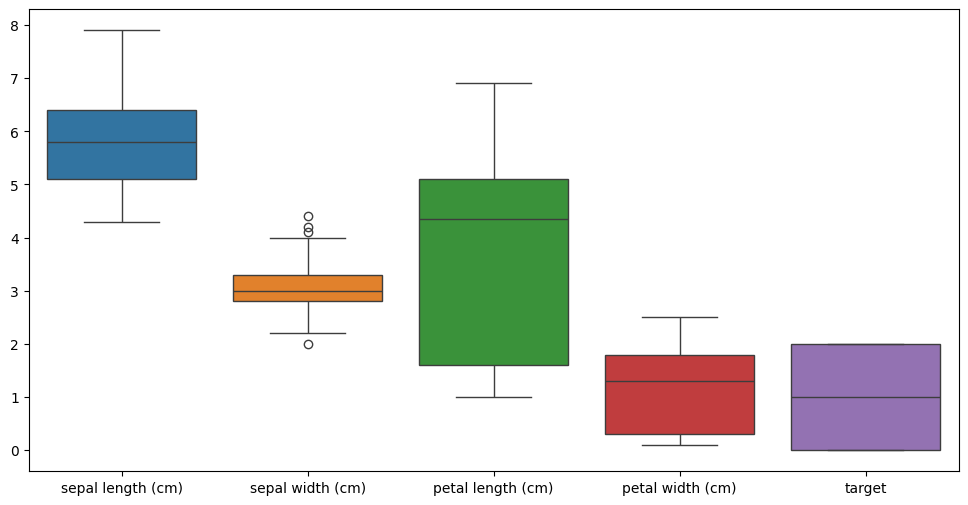

In [5]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize = (12, 6), dpi = 100)
sns.boxplot(df)



In [10]:
print("Före outlier-filtrering: ")
print("X_train: ", X_train.shape, " | X_test: ", X_test.shape )
print("y_train: ", y_train.shape, " | y_test: ", y_test.shape )

Före outlier-filtrering: 
X_train:  (100, 4)  | X_test:  (50, 4)
y_train:  (100,)  | y_test:  (50,)


In [ ]:
#Outlier-filtrering på train med iqr per feature

q1 = X_train.quantile(0.25)
q3 = X_train.quantile(0.75)

iqr = q3 - q1

lower_bounds = q1 - 1.5 * iqr
upper_bounds = q3 + 1.5 * iqr

In [14]:
#Skapa en boolesk-mask för att filtrera bort alla rader med outliers

bool_mask = ((X_train >= lower_bounds) & (X_train <= upper_bounds)).all(axis=1)

X_train_filtered = X_train[bool_mask].copy()
y_train_filtered = y_train.loc[bool_mask].copy()

In [15]:
# Antal rader före och efter
n_before = X_train.shape[0]
n_after = X_train_filtered.shape[0]

print(f"Antal rader före filtrering: {n_before}")
print(f"Antal rader efter filtrering: {n_after}")
print(f"Borttagna rader: {n_before - n_after}")

# Klassfördelning före
print("\nKlassfördelning i y_train före filtrering:")
print(y_train.value_counts().sort_index())

# Klassfördelning efter
print("\nKlassfördelning i y_train efter filtrering:")
print(y_train_filtered.value_counts().sort_index())


Antal rader före filtrering: 100
Antal rader efter filtrering: 99
Borttagna rader: 1

Klassfördelning i y_train före filtrering:
target
0    31
1    35
2    34
Name: count, dtype: int64

Klassfördelning i y_train efter filtrering:
target
0    30
1    35
2    34
Name: count, dtype: int64


##### Skala datan

In [ ]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_filtered) #=> beräknar medelvärde och standardavvikelse på träningen, och skalar den.
X_test_scaled = scaler.transform(X_test)                #=> använder exakt samma skalning (så att testdatan jämförs med träningsdatan på samma villkor).

print("Före skalning (exempel, första raden):")
print(X_train_filtered.iloc[0].values)

print("\nEfter skalning (samma rad):")
print(X_train_scaled[0])

Före skalning (exempel, första raden):
[5.7 2.9 4.2 1.3]

Efter skalning (samma rad):
[-0.14157409 -0.2458512   0.20919718  0.09553895]


##### Skapa och träna knn

In [ ]:

# Skapa en knn-modell
knn = KNeighborsClassifier(
    n_neighbors=5,   
    metric="minkowski",  
    p=2,
    weights="uniform"    
)

# Träna på den skalade träningsdatan
knn.fit(X_train_scaled, y_train_filtered)




,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


##### Utvärdera knn (accuracy, confussion matrix, classification report)

In [ ]:
#Predikta
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred_knn = knn.predict(X_test_scaled)

#Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy_score is:  {acc_knn:.3f}")

#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion matrix (rader = sanna, kolumner = predikterade):")
print(cm_knn)

#Classification report
target_names = load_iris().target_names  
print("\nClassification report:")
print(classification_report(y_test, y_pred_knn, target_names=target_names))

Accuracy_score is:  0.980
Confusion matrix (rader = sanna, kolumner = predikterade):
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

